# Exploring the Complex Plane
We will evaluate a simple equation for every point in the complex plane. Given the location $z$ in the complex plane, we iteratively compute $z=z\cdot z + c$ for a fixed value of $c$. We simply colour the location black if the computation converges or by the rate at which it grows.

For this example we will use Tensorflow to compute it in parallel. We begin by defining an interactive session to enable displaying results when they are comupted.

In [12]:
import tensorflow as tf
import numpy as np

#log_device_placement shows the mapping of variables etc. to CPU/GPU
sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True)) 

Define a grid with specific extents, a subset of of the complex plane to explore

In [13]:
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
#Y, X = np.mgrid[-2:2:0.005, -2:2:0.005]
Y, X = np.mgrid[-1.4:1.4:0.005, -1.5:1.5:0.005]
Z = X+1j*Y

Define the variables and constants that will be used for the computation and initialise them. Tensorflow builds a computational graph of the computation that is to be done before any calculations are actually. This is to ensure the correct resources are allocated to allow seamless integration and running on multiple devices.

In [14]:
#c = tf.constant(-0.35+0.65*1j)
c = tf.constant(-0.35+0.62*1j)
xs = tf.constant(Z.astype(np.complex128))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

tf.global_variables_initializer().run() #init variables

Define the equation to be computed. The computation is not done until the graph is explicitly executed.

In [15]:
# Compute the new values of z: z^2 + x
zs_ = zs*zs + c

Define how we compute the divergence of the iteration.

In [16]:
# Have we diverged with this new value?
not_diverged = tf.abs(zs_) < 4

In [17]:
# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group( zs.assign(zs_), ns.assign_add(tf.cast(not_diverged, tf.float32)) )

In [18]:
#run
for i in range(200): 
    step.run()

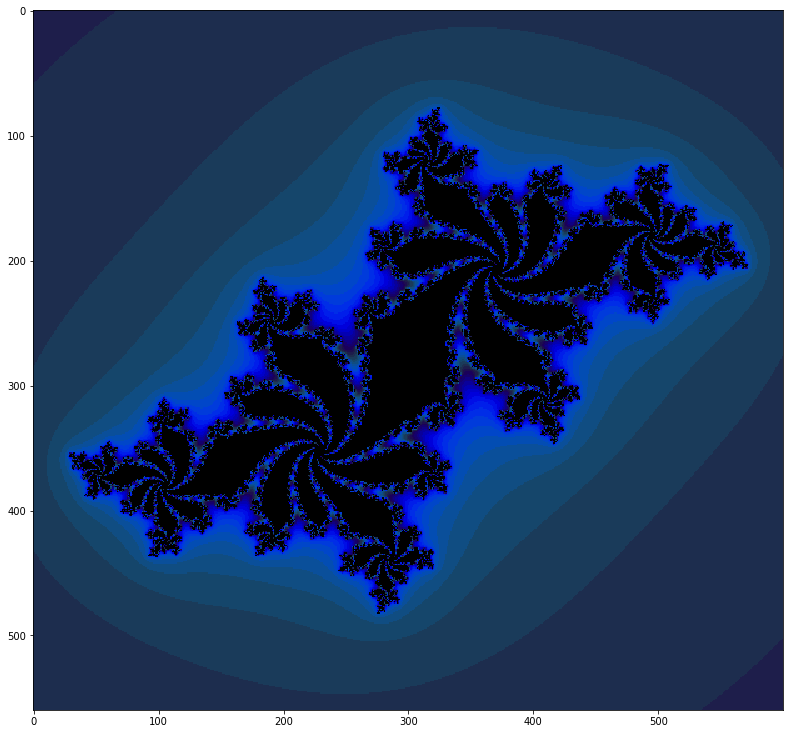

In [20]:
#plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 10))

def processFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal.
  """
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  return a
  
plt.imshow(processFractal(ns.eval()))
plt.tight_layout(pad=0)
plt.show()